In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Functions

In [2]:
def capacity(vec,ps):
    out=0
    if vec[0]==0:
        return 0
    for i in range(1,len(vec)):
        if vec[i]==0 and vec[i-1]>0:
            out=ps[i]
    if out==0:
        out=ps[-1]
    return out

# single sparsity analysis

In [8]:
simulationName="L10"
ms=load(simulationName+"/ms.npy")
gammas=load(simulationName+"/gammas.npy")
gammas1=gammas
samples=10

In [9]:
overlapTH=0.85*max(load(simulationName+"/overlaps_0_0_0.npy"))
rfs=[]
for i in range(len(ms)):
    overlaps=np.zeros((len(gammas),samples,int(ms[i])))
    retrieval=np.zeros((len(gammas),samples))
    maxoverlaps=np.zeros((len(gammas),samples))
    for j in range(len(gammas)):
        for k in range(samples):
            overlaps[j][k]=load(simulationName+"/overlaps_"+str(i)+"_"+str(j)+"_"+str(k)+".npy")
            if max(overlaps[j][k])>overlapTH:
                retrieval[j][k]=1
    rf=np.zeros(len(gammas))
    for j in range(len(retrieval)):
        rf[j]=mean(retrieval[j])
    rfs.append(rf)
rfs1=asarray(rfs).T

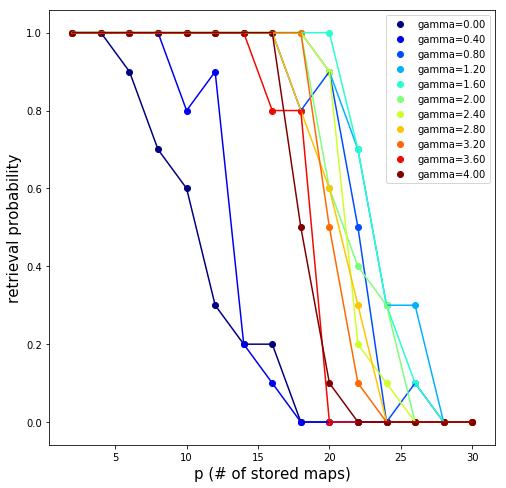

In [10]:
colors = cm.jet(np.linspace(0,1,len(rfs1)))
figure(figsize(8,8))
for r in range(len(rfs1)):
    scatter(ms,rfs1[r],label="gamma=%.2f" % gammas[r],color=colors[r])
    plot(ms,rfs1[r],c=colors[r])
xlabel("p (# of stored maps)",fontsize=15)
ylabel("retrieval probability",fontsize=15)
legend()

In [11]:
alphas=[]
for r in range(len(rfs1)):
    alphas.append(capacity(rfs1[r],ms))

Text(0,0.5,'Storage capacity $\\alpha_{c}$')

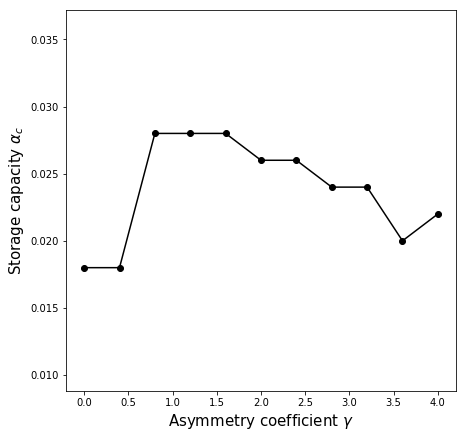

In [12]:
figure(figsize=(7,7))
scatter(gammas,asarray(alphas)/1000.0,c="k")
plot(gammas,asarray(alphas)/1000.0,c='k')
xlabel(r"Asymmetry coefficient $\gamma$",fontsize=15)
ylabel(r"Storage capacity $\alpha_{c}$",fontsize=15)
#axvline(x=1,linestyle='--',c="k")
#plot(x,alpha(x,A,B,C))
#axvline(x=2*(sqrt(2)-1))
#savefig("storage_capacity_2D.eps")

# L - $\gamma$ contour plot

In [19]:
simulations=["L5","L7","L8","L9","L10","L11","L13","L15","L18","L20"]
mapSparsities=[1.0/pow(5,2),1.0/pow(7,2),1.0/pow(8,2),1.0/pow(9,2),1.0/pow(10,2),1.0/pow(11,2),1.0/pow(13,2),1.0/pow(15,2),1.0/pow(18,2),1.0/pow(20,2)]

In [20]:
RetrievalFractions=[]
AggregatedMaps=[]
AggregatedGammas=[]
for simulationName in simulations:
    ms=load(simulationName+"/ms.npy")
    AggregatedMaps.append(ms)
    gammas=load(simulationName+"/gammas.npy")
    AggregatedGammas.append(gammas)
    samples=10
    overlapTH=0.9*max(load(simulationName+"/overlaps_0_0_0.npy"))
    rfs=[]
    for i in range(len(ms)):
        overlaps=np.zeros((len(gammas),samples,int(ms[i])))
        retrieval=np.zeros((len(gammas),samples))
        maxoverlaps=np.zeros((len(gammas),samples))
        for j in range(len(gammas)):
            for k in range(samples):
                overlaps[j][k]=load(simulationName+"/overlaps_"+str(i)+"_"+str(j)+"_"+str(k)+".npy")
                if max(overlaps[j][k])>overlapTH:
                    retrieval[j][k]=1
        rf=np.zeros(len(gammas))
        for j in range(len(retrieval)):
            rf[j]=mean(retrieval[j])
        rfs.append(rf)
    RetrievalFractions.append(asarray(rfs).T)

In [21]:
alphas=[]
for i in range(len(RetrievalFractions)):
    alphas1=[]
    for j in range(len(RetrievalFractions[i])):
        alphas1.append(capacity(RetrievalFractions[i][j],AggregatedMaps[i]))
    alphas.append(alphas1)

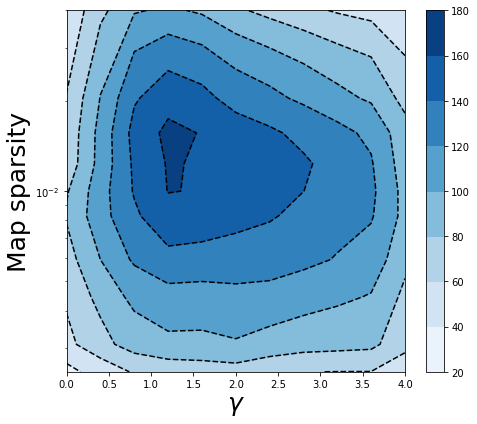

In [23]:
import scipy.ndimage
import numpy as np
from scipy.interpolate import RectBivariateSpline
import matplotlib.pyplot as plt
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D

sigma=[0.8,0.8]

# Regularly-spaced, coarse grid
dx, dy = 0.4, 0.4
xmax, ymax = 2, 4
x = AggregatedGammas[0]
y = flip(mapSparsities,0)
X, Y = np.meshgrid(x, y)
Z = flip(alphas,0)*(10000.0/1600.0)

interp_spline = RectBivariateSpline(y, x, Z)

# Regularly-spaced, fine grid
x2 = np.arange(0,2.1,0.2)
y2 = np.arange(0.01,0.21,0.01)
X2, Y2 = np.meshgrid(x2,y2)
Z2 = interp_spline(y2, x2)

#Z2[Z2 < 0] = 0


Z2 = sp.ndimage.filters.gaussian_filter(Z,sigma, mode='constant')


fig=figure(figsize=(7,6))
plt.contour(X, Y, Z2,7,colors="k",linestyles="--")
plt.contourf(X, Y, Z2,7,cmap=cm.Blues)
#plt.scatter(X,Y)
xlabel(r"$\gamma$",fontsize=25)
ylabel(r"Map sparsity",fontsize=25)

yscale("log")
#axhline(y=0.013,linestyle="--",linewidth=3,c="k")
#axvline(x=1.5,linestyle="--",linewidth=3,c="k")

colorbar()

fig.tight_layout()
plt.show()